In [1]:
# basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df

,v1,v2,unnamed:2,unnamed:3,unnamed:4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# steps to be followed

# Data cleaning
# EDA
# Text preprocessing 
# Model building
# evaluation
# imporvements
# website
# deployment

### 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   v1         5572 non-null   object
 1   v2         5572 non-null   object
 2   unnamed:2  50 non-null     object
 3   unnamed:3  12 non-null     object
 4   unnamed:4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


most of the values are missing from last three columns possibly they doesn't contain some neccesary information. We'll drop them.

In [7]:
# dropping last three columns
df.drop(columns=['unnamed:2','unnamed:3','unnamed:4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
4631,ham,"I'm in a meeting, call me later at"
2994,ham,Mm not entirely sure i understood that text bu...
4529,ham,Don't forget though that I love you .... And I...
2349,ham,Yar else i'll thk of all sorts of funny things.
4660,ham,Ok no prob...


In [9]:
# renaming the columns
df.rename(columns={
    'v1':'target',
    'v2':'text'
},inplace=True)

In [10]:
df.sample(5)

,target,text
79,ham,Its not the same here. Still looking for a job...
827,ham,Hey. You got any mail?
5388,ham,NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!
238,ham,"New Theory: Argument wins d SITUATION, but los..."
1979,ham,Shhhhh nobody is supposed to know!


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])
# converts spam to 1 and ham to 0

In [13]:
df.head(5)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# checking for missing values
df.isnull().sum()
# we can see that there is no missing values in the dataframe

target    0
text      0
dtype: int64

In [15]:
#checking for duplicate values
df.duplicated().sum()

403

In [16]:
# we have remove duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

### 2. EDA

In [19]:
# fiding what percentage of data is spam or ham
spam_count = df[df.target == 1].count()['text']

In [20]:
spam_count

653

In [21]:
ham_count = df[df.target == 0].count()['text']

In [22]:
ham_count

4516

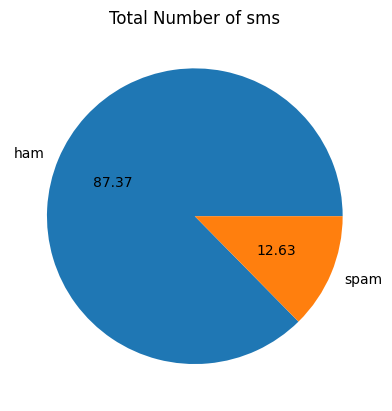

In [59]:
# creating a pie chart for representing ham and spam
plt.title('Total Number of sms')
plt.pie(x=df.target.value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# data is imbalanced

In [25]:
import nltk # natural language toolkit

In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tushar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df['num_characters'] = df['text'].apply(len) # counting number of characters in messages

/tmp/ipykernel_3858/2851127858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len) # counting number of characters in messages


In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# number of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

/tmp/ipykernel_3858/1058284143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
# number of sentences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

/tmp/ipykernel_3858/2917938607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.924163,18.456761,1.966531
std,0.332253,58.175349,13.325633,1.449833
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [34]:
df[df.target == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df.target == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<AxesSubplot: title={'center': 'Number of characters'}, xlabel='num_characters', ylabel='Count'>

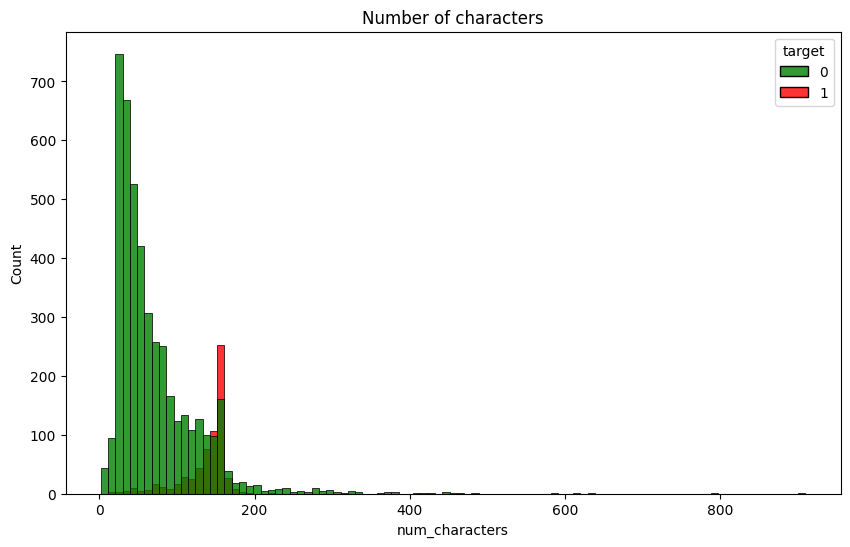

In [36]:
plt.figure(figsize=(10,6))
plt.title('Number of characters')
sns.histplot(df,x='num_characters',hue='target',palette=['green','red'],alpha=0.8)

We can observe that messages containing more words are more likely to be spam

<AxesSubplot: title={'center': 'Number of words'}, ylabel='Count'>

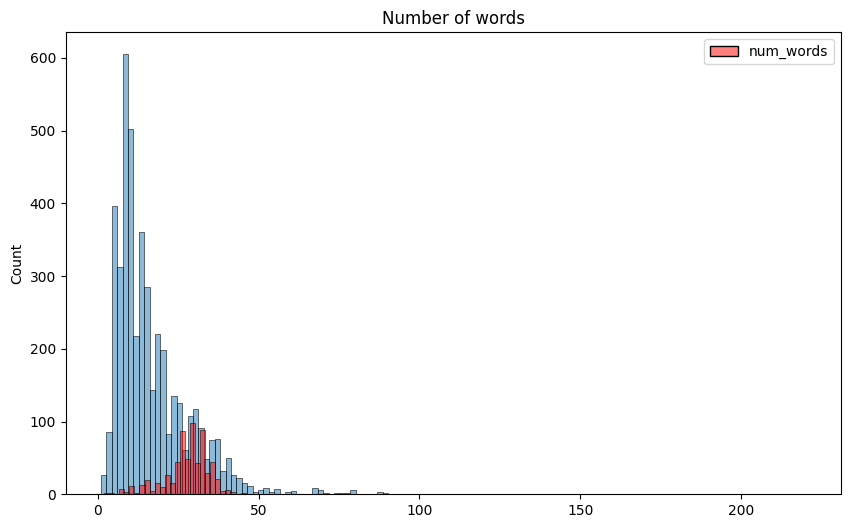

In [37]:
plt.figure(figsize=(10,6))
plt.title('Number of words')
sns.histplot(df[df.target == 0][['num_words']])
sns.histplot(df[df.target == 1][['num_words']],palette=['red'])

It can be observed that messages containing more number of words are likely to be spam

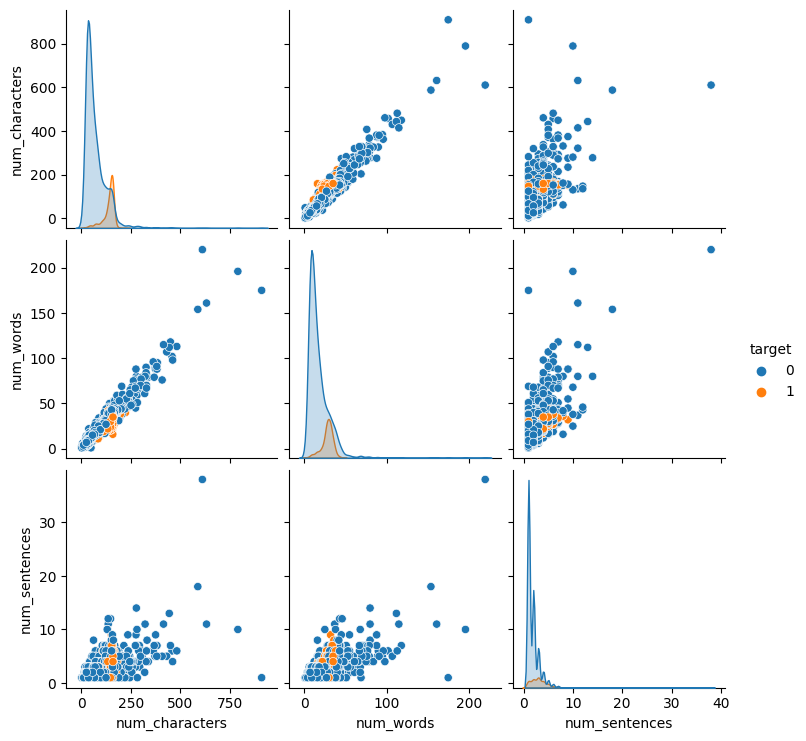

In [38]:
sns.pairplot(df,hue='target')

/tmp/ipykernel_3858/4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

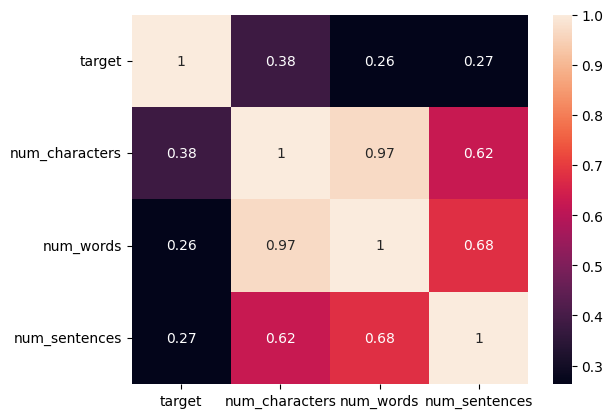

In [39]:
sns.heatmap(df.corr(),annot=True)

Here we can see that num_characters, num_words and num_sentences have a very strong correlation. So we will be using just num_characters for training our model as it has highest corrleation with target among three.

### Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special Characters
4. removing stop words and punctuation
5. stemming

In [40]:
from nltk.corpus import stopwords
import string

In [41]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/tushar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
# stemming 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
def tranform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        # removing special characters
        # checkigng for alpha numeric columns
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [44]:
tranform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [45]:
df['transformed_text']=df['text'].apply(tranform_text)

/tmp/ipykernel_3858/1730057144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(tranform_text)


In [46]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
380,0,I guess that's why you re worried. You must kn...,300,70,6,guess worri must know way bodi repair quit sur...
2428,0,She.s find. I sent you an offline message to k...,67,16,2,find sent offlin messag know anjola
2787,0,"Forgot it takes me 3 years to shower, sorry. W...",78,18,2,forgot take 3 year shower sorri phone dead yet
4045,1,Win a �1000 cash prize or a prize worth �5000,45,10,1,win cash prize prize worth
5402,0,Hi babe its me thanks for coming even though i...,129,30,2,hi babe thank come even though didnt go well w...


In [47]:
#word cloud: contains most frequent words used in ham and spam
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [177]:
spam_wc = wc.generate(df[df.target == 1]['transformed_text'].str.cat(sep=" "))

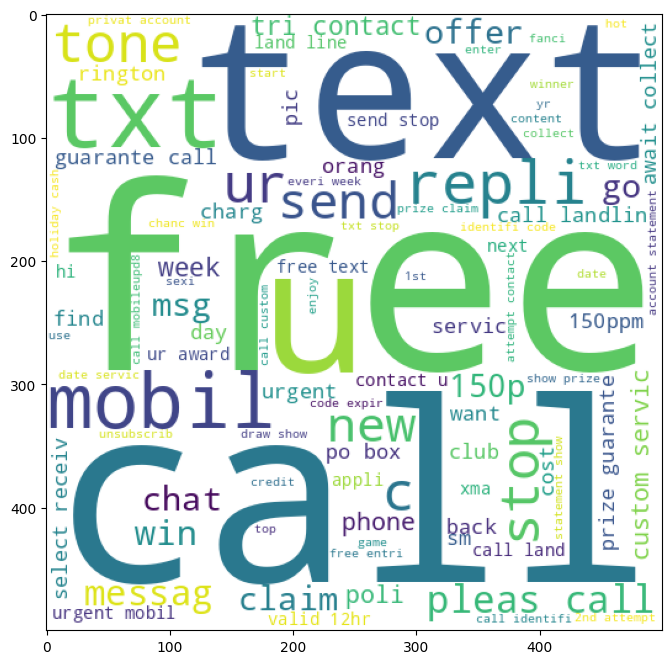

In [178]:
plt.figure(figsize=(12,8))
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df.target == 0]['transformed_text'].str.cat(sep=" "))

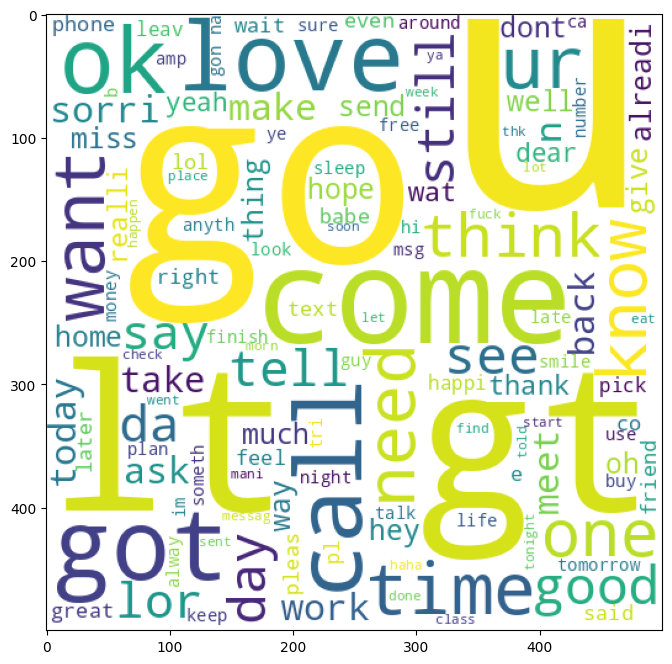

In [51]:
plt.figure(figsize=(12,8))
plt.imshow(ham_wc)

In [52]:
#finding top 30 words in ham and spam
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [53]:
len(spam_corpus) # all the words in spam

9941

In [54]:
from collections import Counter

In [55]:
# 5 most common words used in spam messages
spam_frequent = pd.DataFrame(Counter(spam_corpus).most_common(30))

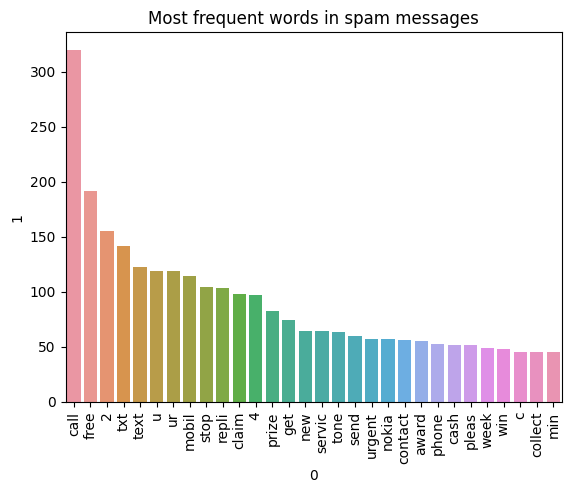

In [65]:
# this will give top 30 words used in spam messages

# using a barplot to visualize better

sns.barplot(x=spam_frequent[0],y=spam_frequent[1])
plt.title('Most frequent words in spam messages')
plt.xticks(rotation = 'vertical')
plt.show()

In [60]:
ham_corpus = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [61]:
len(ham_corpus) # all the words in ham messages

35305

In [62]:
ham_frequent = pd.DataFrame(Counter(ham_corpus).most_common(30))
ham_frequent.sample(5)

,0,1
20,lor,159
5,2,284
23,think,149
3,gt,288
4,lt,287


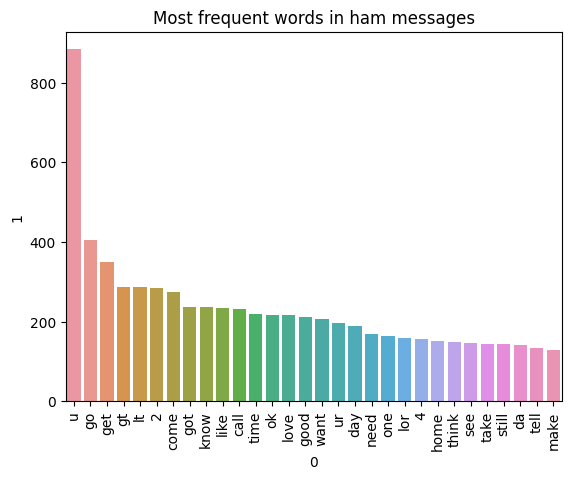

In [64]:
sns.barplot(data=ham_frequent,x=0,y=1)
plt.xticks(rotation='vertical')
plt.title("Most frequent words in ham messages")
plt.show()

### 4. Model Building

There are many classification algorithms but I am here going with naive bayes as it performs really well with text data

In [138]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [162]:
df.head(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [205]:
# vectorizing data into bag of words 
X = cv.fit_transform(df['transformed_text']).toarray()

In [161]:
X[9]

array([0, 0, 0, ..., 0, 0, 0])

In [140]:
X.shape

(5169, 6677)

In [141]:
y  = df['target'].values

In [142]:
from sklearn.model_selection import train_test_split

In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [145]:
# importing all the naive baye's as currently we dont know the distribution
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [146]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [148]:
# gaussian naive bayes
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [160]:
# multinomial naive bayes
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[872  24]
 [ 12 126]]
0.84


In [150]:
# bernoulli baive bayes
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


Above all the models bernoulli has performed well using bag of words

In [207]:
# vectorizing using tfidf
X2 = tfidf.fit_transform(df['transformed_text'])

In [206]:
tfidf.fit_transform(df['transformed_text'])

<5169x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 36747 stored elements in Compressed Sparse Row format>

In [183]:
X2.shape

(5169, 3000)

In [208]:
tfidf.get_feature_names_out()

array(['008704050406', '07xxxxxxxxx', '0800', ..., 'zed', 'zindgi', 'zoe'],
      dtype=object)

In [164]:
X2.shape

(5169, 3000)

In [187]:
count = 0
for i in range(len(X2)):
    for j in X2[i]:
        if j==1:
            count += 1
count 

185

In [195]:
X2_train,X2_test,y_train,y_test = train_test_split(X2,y,test_size = 0.2,random_state=2)

In [196]:
# gaussian naive bayes
gnb.fit(X2_train,y_train)
y1_pred1 = gnb.predict(X2_test)
print(accuracy_score(y_test,y1_pred1))
print(confusion_matrix(y_test,y1_pred1))
print(precision_score(y_test,y1_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [209]:
# multinomial naive bayes
mnb.fit(X2_train,y_train)
y1_pred2 = mnb.predict(X2_test)
print(accuracy_score(y_test,y1_pred2))
print(confusion_matrix(y_test,y1_pred2))
print(precision_score(y_test,y1_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [198]:
# bernoulli naive bayes
bnb.fit(X2_train,y_train)
y1_pred3 = bnb.predict(X2_test)
print(accuracy_score(y_test,y1_pred3))
print(confusion_matrix(y_test,y1_pred3))
print(precision_score(y_test,y1_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


So, here we'll go with multinomial naive bayes, even though the accuracy is less as compared to bernoulli but precision score is much better. As the data was imbalanced accuracy will not be the most significant metric here. 

We wish to classify messages as spam or not so we need minimum false positive i.e. we won't be having much problem if a spam messages is classified as ham but it will definitely an issue if ham is classified as spam. So false positive should be minimized in this scenario.

In [90]:
# tfidf - mnb

In [192]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))